# An Incremental Implementation

Is there a way that we could generate unique random numbers without keeping track of all the numbers generated so far?

## Right Idea - Bad Distribution

In [3]:
import random
from typing import Generator

def generate_unique_random_numbers(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    if max_num - min_num + 1 < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")
    
    remaining_count = batch_size
    number = None

    while remaining_count > 0:
        next_min = number if number is not None else 0
        next_max = max_num - remaining_count + 1
        remaining_count -= 1
        number = random.randint(next_min, next_max)
        yield number

In [4]:
list(generate_unique_random_numbers(0, 9, 3))

[5, 8, 9]

Chi-Square Statistic: 607.5799999999999
P-Value: 4.943768300939688e-125


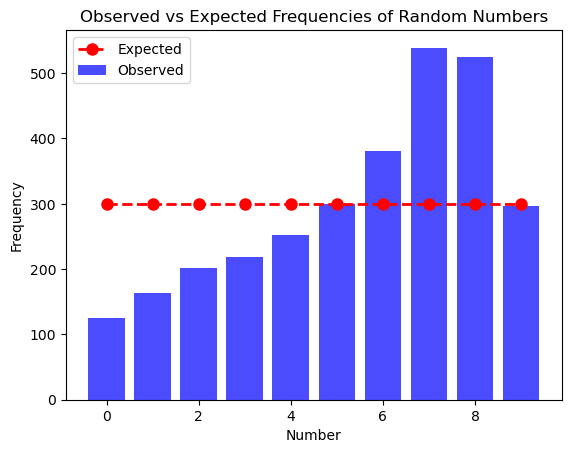

In [5]:
import utils

utils.run_and_plot(generate_unique_random_numbers, 0, 9, 3, 1000)

Here you can see that there is a clear bias towards the higher numbers so this isn't quite right.

It is still fast even if the range is large.

In [11]:
%time list(generate_unique_random_numbers(0, 10**100, 3))

CPU times: user 60 μs, sys: 1 μs, total: 61 μs
Wall time: 67.2 μs


[1409913211556826722263180117803521630536159498997905495008982029547353437134260178631085358407910821,
 9967178976503078365943024306545041581148013199410683100506170089838574129244056970858827040018852507,
 9972088843216131070979819326450343838239274929968310995003589813740364072806825999519053261638280109]

What happens if we want to generate a lot of unique random numbers?

In [8]:
%time utils.run_and_ignore(lambda: generate_unique_random_numbers(0, 10**100, 10**5))

CPU times: user 46.4 ms, sys: 1.45 ms, total: 47.9 ms
Wall time: 47.5 ms


In [9]:
%time utils.run_and_ignore(lambda: generate_unique_random_numbers(0, 10**100, 10**6))

CPU times: user 434 ms, sys: 3.77 ms, total: 437 ms
Wall time: 440 ms


In [10]:
%time utils.run_and_ignore(lambda: generate_unique_random_numbers(0, 10**100, 10**7))

CPU times: user 4.22 s, sys: 15.1 ms, total: 4.23 s
Wall time: 4.24 s


In [7]:
%time utils.run_and_ignore(lambda: generate_unique_random_numbers(0, 10**100, 10**8))

CPU times: user 44.7 s, sys: 137 ms, total: 44.8 s
Wall time: 44.9 s


It is nearly twice as fast as the naive implementation and uses a constant amount of memory.